# Localized Exploratory Analysis

This exploratory analysis was done with the purpose of understanding the behavior of the meteorological variables with the Dengue variables in a specific municipality. It is worth noting that the files read in this notebook have already been preprocessed. And this notebook is designed to receive any municipality and run the analysis for the given municipality without much change to the code.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set_style("ticks")
import pandas as pd
from datetime import datetime
import glob
import os

In [ ]:
df = pd.read_csv("cali_consolidado_2007_2020.csv", index_col = 0, parse_dates= True)

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAY', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

In [ ]:
municipality = "Cali"

In [ ]:
def plot_time_series(dates_array, values_array,  labels, colors, title, x_label, y_label, kind = "lineplot", fulldates = False):
    """
    Function to plot time series: 
    
    dates: must be an array of datetime series for the x axis
    values: the array of y axis values to plot
    labels: the array of labels for each plot
    title: string that goes above the plot
    x_label: string that goes on the x-axis
    y_label: string that goes on the y-axis
    kind: the type of the graph
    fulldates: if the plot is going to receive full dates or just numbers.
    """
    years_locator = mdates.YearLocator()
    months_locator = mdates.MonthLocator()
    years_format = mdates.DateFormatter('%Y')
    sns.set_style('ticks')
    fig, ax = plt.subplots(1,1, figsize=(12,5), dpi = 150)

    ax.ticklabel_format(axis='y', style='plain')
    if fulldates:
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_major_locator(years_locator)
        ax.xaxis.set_major_formatter(years_format)
        ax.xaxis.set_minor_locator(months_locator)
    
    for i in range(len(dates_array)):
        if kind == "lineplot":
            sns.lineplot(x=dates_array[i], y=values_array[i],  label = labels_array[i], color = colors[i], ax = ax)

    rotation = 45
    plt.setp(ax.get_xticklabels(), rotation=rotation)
    plt.xlabel(x_label, fontsize='16')
    plt.ylabel(y_label, fontsize='16')
    plt.title(title, fontsize='18')

    plt.show()

# TEMPERATURE PLOTS

The temperature variable must always looked at in 3 different forms, the maximum, minimum and mean temperature. 

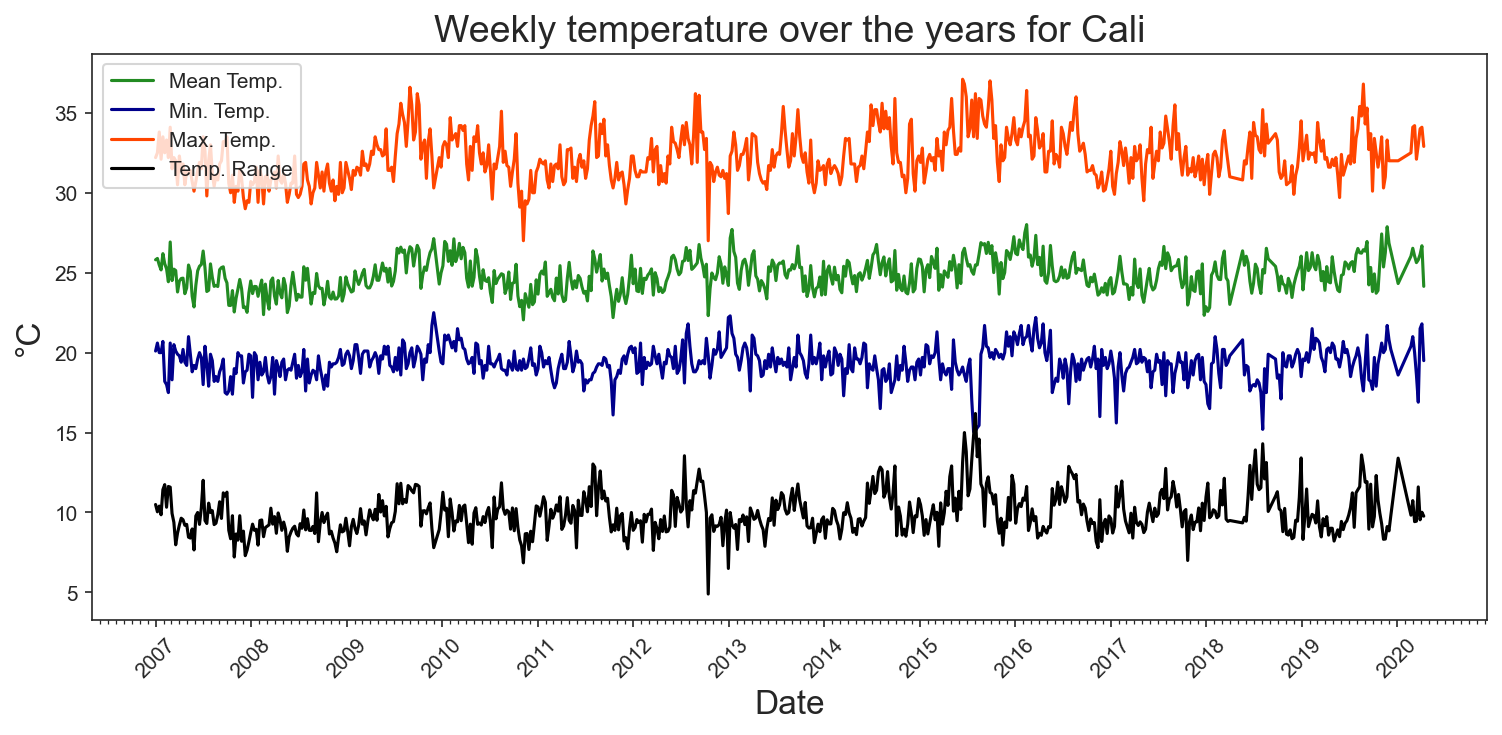

In [ ]:
x_array = [df.index]*4
y_array = [df["TEMPERATURE_MEAN"], df["TEMPERATURE_AMIN"],df["TEMPERATURE_AMAX"] , df["TEMPERATURE_RANGE"]]
labels_array = ["Mean Temp.", "Min. Temp.", "Max. Temp." , "Temp. Range"]
colors = ["forestgreen","darkblue","orangered","black"]
title = "Weekly temperature over the years for " + municipality
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)

In [ ]:
df_filt = df[(df["ANO"]>=2007) & (df["ANO"]<=2019)]
x_array = [df_filt["ANO"]]*4
y_array = [df_filt["TEMPERATURE_MEAN"], df_filt["TEMPERATURE_AMIN"],df_filt["TEMPERATURE_AMAX"] , df_filt["TEMPERATURE_RANGE"]]
labels_array = ["Mean Temp.", "Min. Temp.", "Max. Temp." , "Temp. Range"]
colors = ["forestgreen","darkblue","orangered","black"]
title = "Temperature over the years for " + municipality
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot")

Text(0.5, 0, 'Month')

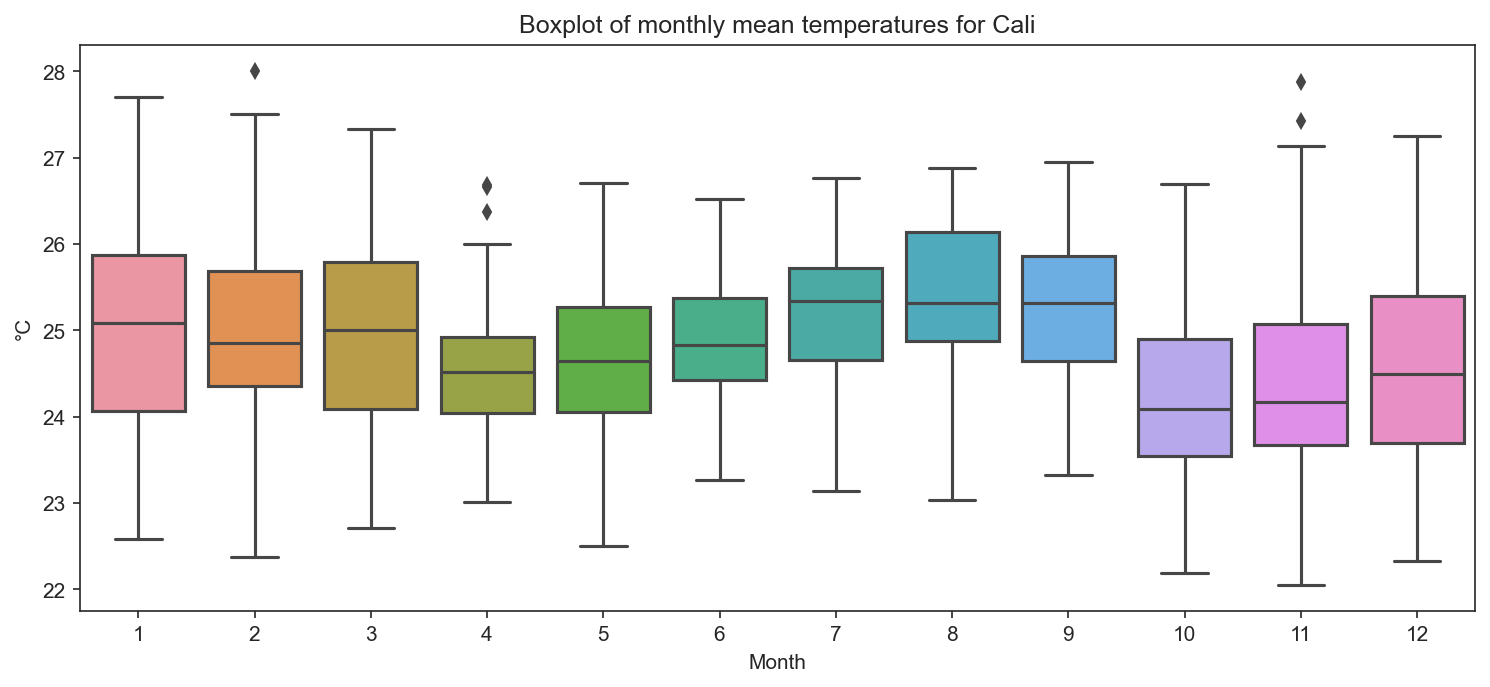

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["TEMPERATURE_MEAN"])
axes.set_title("Boxplot of monthly mean temperatures for " + municipality)
axes.set_ylabel("°C")
axes.set_xlabel("Month")

# HUMIDITY PLOTS

The humidity variable must always looked at in 3 different forms, the maximum, minimum and mean humidity. 

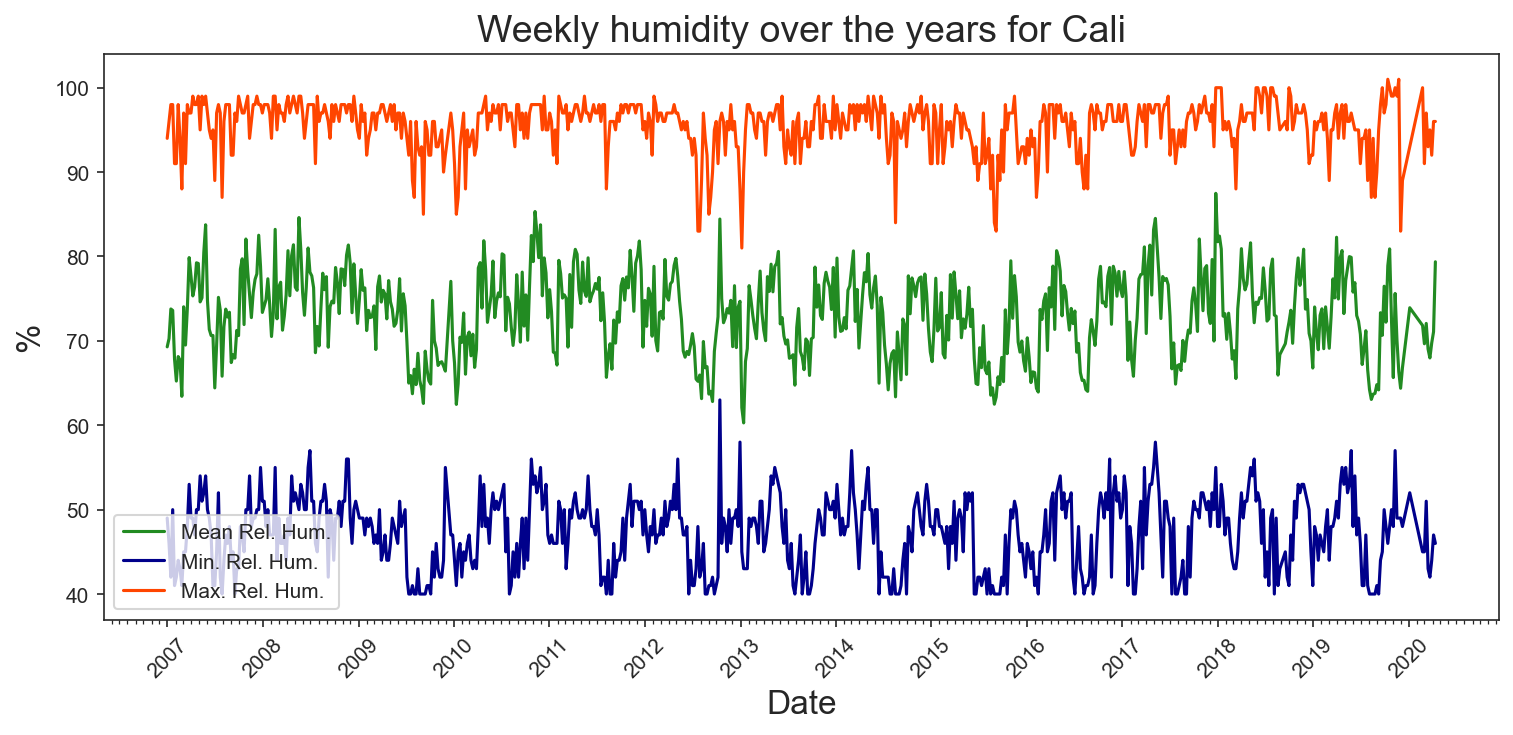

In [ ]:
x_array = [df.index]*3
y_array = [df["REL_HUMIDITY_MEAN"], df["REL_HUMIDITY_AMIN"],df["REL_HUMIDITY_AMAX"] ]
labels_array = ["Mean Rel. Hum.", "Min. Rel. Hum.", "Max. Rel. Hum."]
title = "Weekly humidity over the years for " + municipality
colors = ["forestgreen","darkblue","orangered"]
ylabel = "%"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array, colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

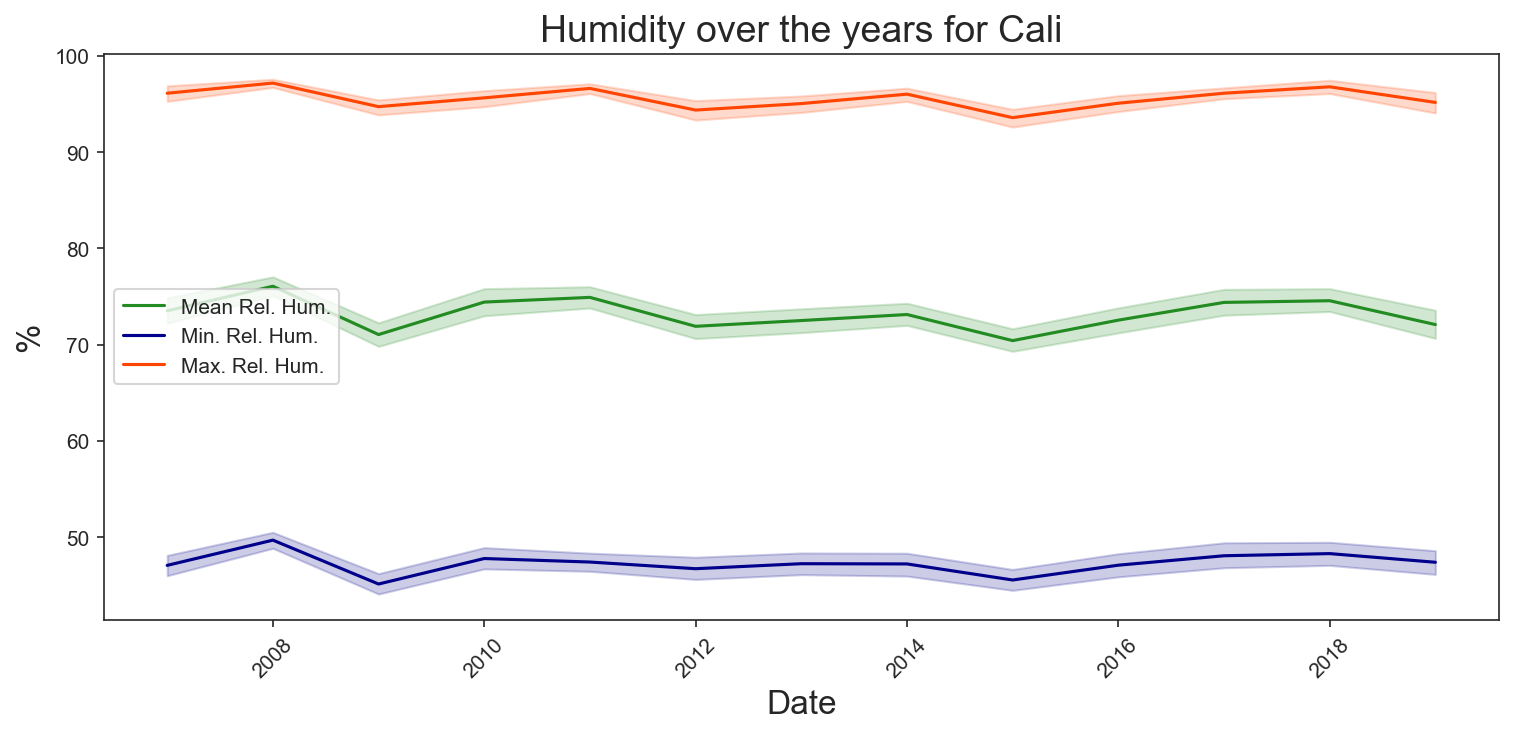

In [ ]:
x_array = [df_filt["ANO"]]*3
y_array = [df_filt["REL_HUMIDITY_MEAN"], df_filt["REL_HUMIDITY_AMIN"],df_filt["REL_HUMIDITY_AMAX"] ]
labels_array = ["Mean Rel. Hum.", "Min. Rel. Hum.", "Max. Rel. Hum."]
title = "Humidity over the years for " + municipality
ylabel = "%"
xlabel = "Date"
colors = ["forestgreen","darkblue","orangered"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = False)

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["REL_HUMIDITY_MEAN"])
axes.set_title("Boxplot of monthly relative humidities for " + municipality)
axes.set_ylabel("%")
axes.set_xlabel("Month")

Text(0.5, 0, 'Month')

# PRECIPITATION PLOTS

The precipitation variable, due to its nature, must be analyzed as the total precipitation. The maximum and minimums in this variable do not describe the general behavior of the variable.

In [ ]:
x_array = [df.index]
y_array = [df["PRECIPITATION"]]
labels_array = ["Precipitation"]
title = "Weekly precipitation over the years for " + municipality
ylabel = "mm"
xlabel = "Date"
colors = ["darkblue"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)

Text(0.5, 0, 'Month')

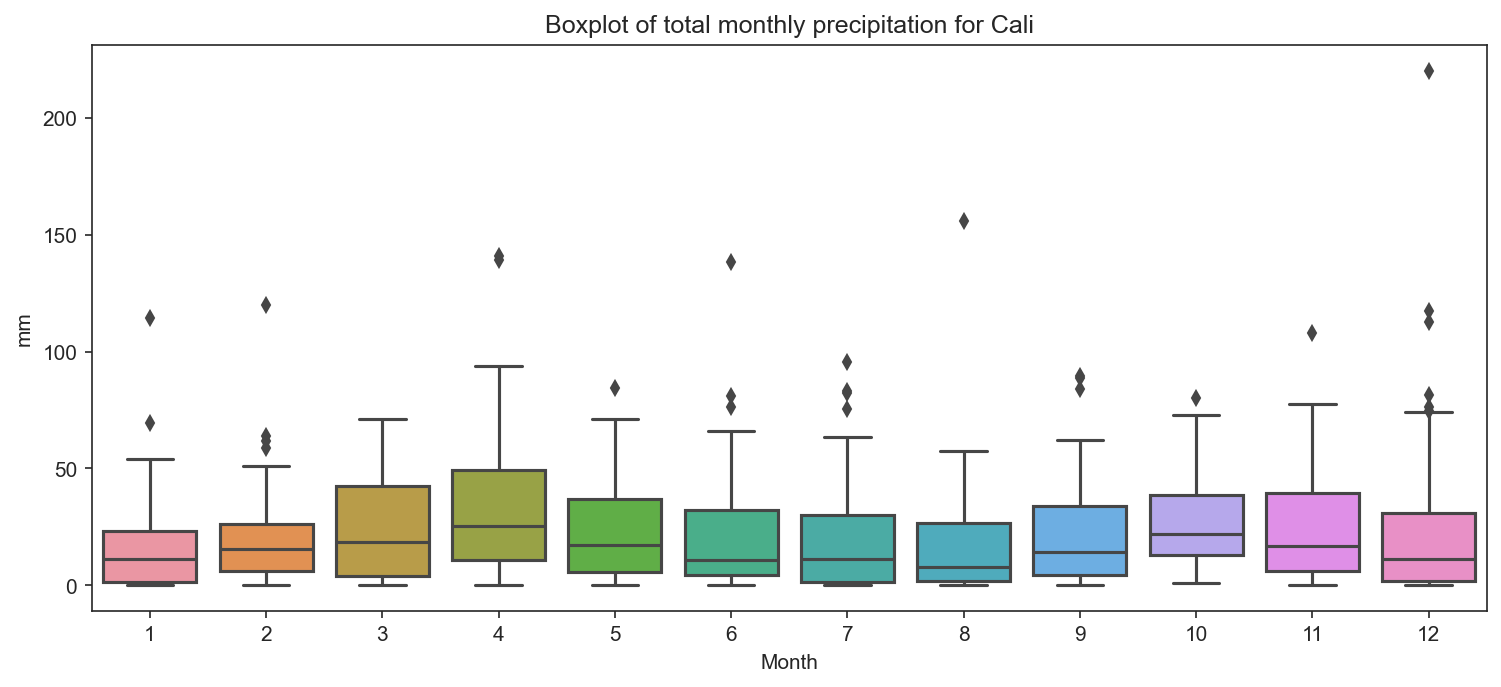

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["PRECIPITATION"])
axes.set_title("Boxplot of total monthly precipitation for " + municipality)
axes.set_ylabel("mm")
axes.set_xlabel("Month")

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAY', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

In [ ]:
df_prec_yearly = df[(df.index.year >= 2007) & (df.index.year <= 2019)]
df_prec_yearly = df_prec_yearly[["PRECIPITATION","DRY_DAY"]]
df_prec_yearly = df_prec_yearly.groupby(df_prec_yearly.index.year).sum()
x_array = [df_prec_yearly.index]
y_array = [df_prec_yearly["PRECIPITATION"]]
labels_array = ["Precipitation"]
title = "Total precipitation over the years for " + municipality
ylabel = "mm"
xlabel = "Year"
colors = ["darkblue"]
plot_time_series(x_array, y_array, labels_array, colors, title, xlabel,ylabel, "lineplot", fulldates = False)

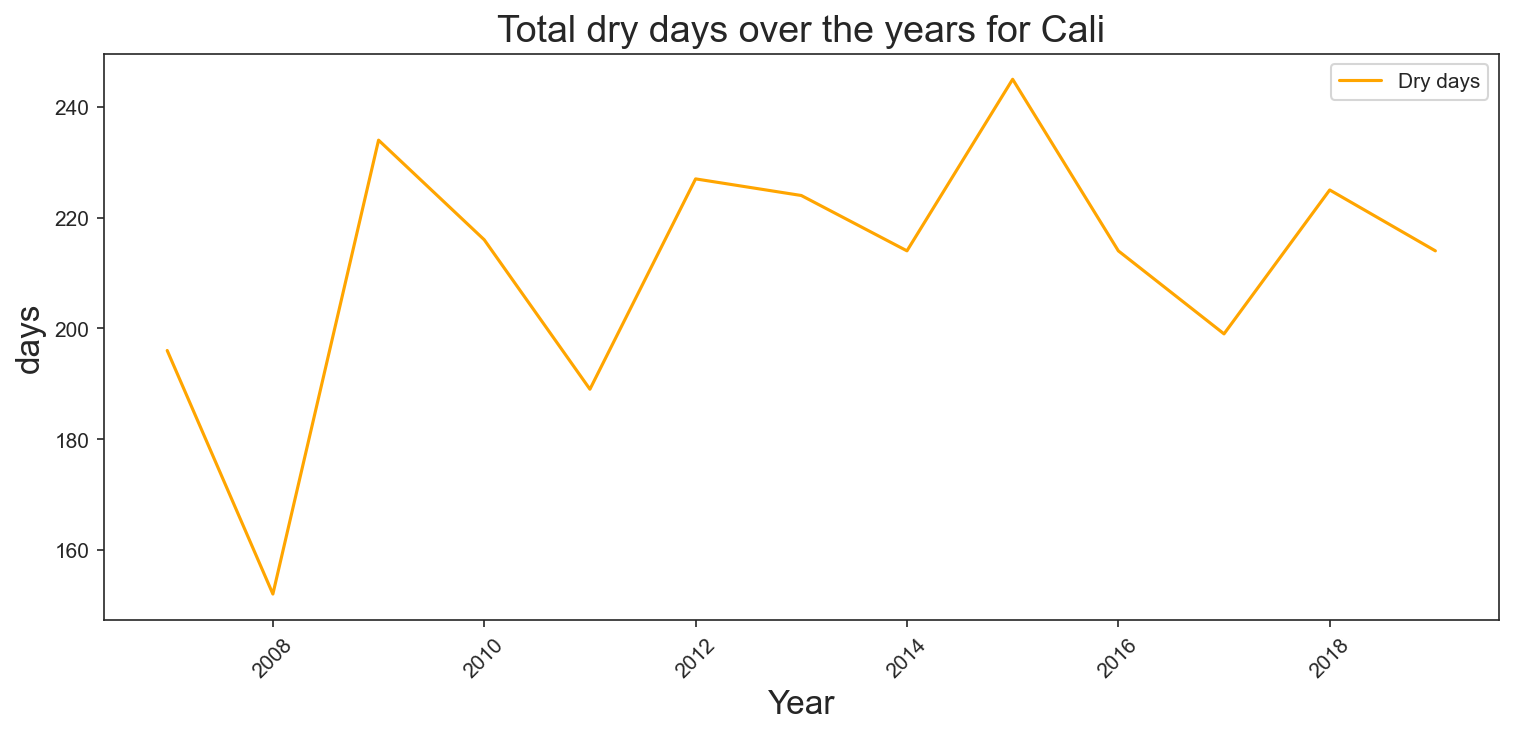

In [ ]:
x_array = [df_prec_yearly.index]
y_array = [df_prec_yearly["DRY_DAY"]]
labels_array = ["Dry days"]
title = "Total dry days over the years for " + municipality
ylabel = "days"
xlabel = "Year"
colors = ["orange"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = False)

# NIÑO PLOTS

The Niño indexes are also very important features to analyze in this project. That is why it is interesting to analyze and understand their behavior in time series plots.

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAY', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

In [ ]:
x_array = [df.index]*3
y_array = [df["MEI"], df["ONI"], df["TNI"]]
labels_array = ["Mutivariate ENSO Index", "Oceanic Niño Index", "Trans Niño Index"]
colors = ["black","forestgreen","darkblue","orangered","cyan","black"]
title = "Niño indexes"
ylabel = ""
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

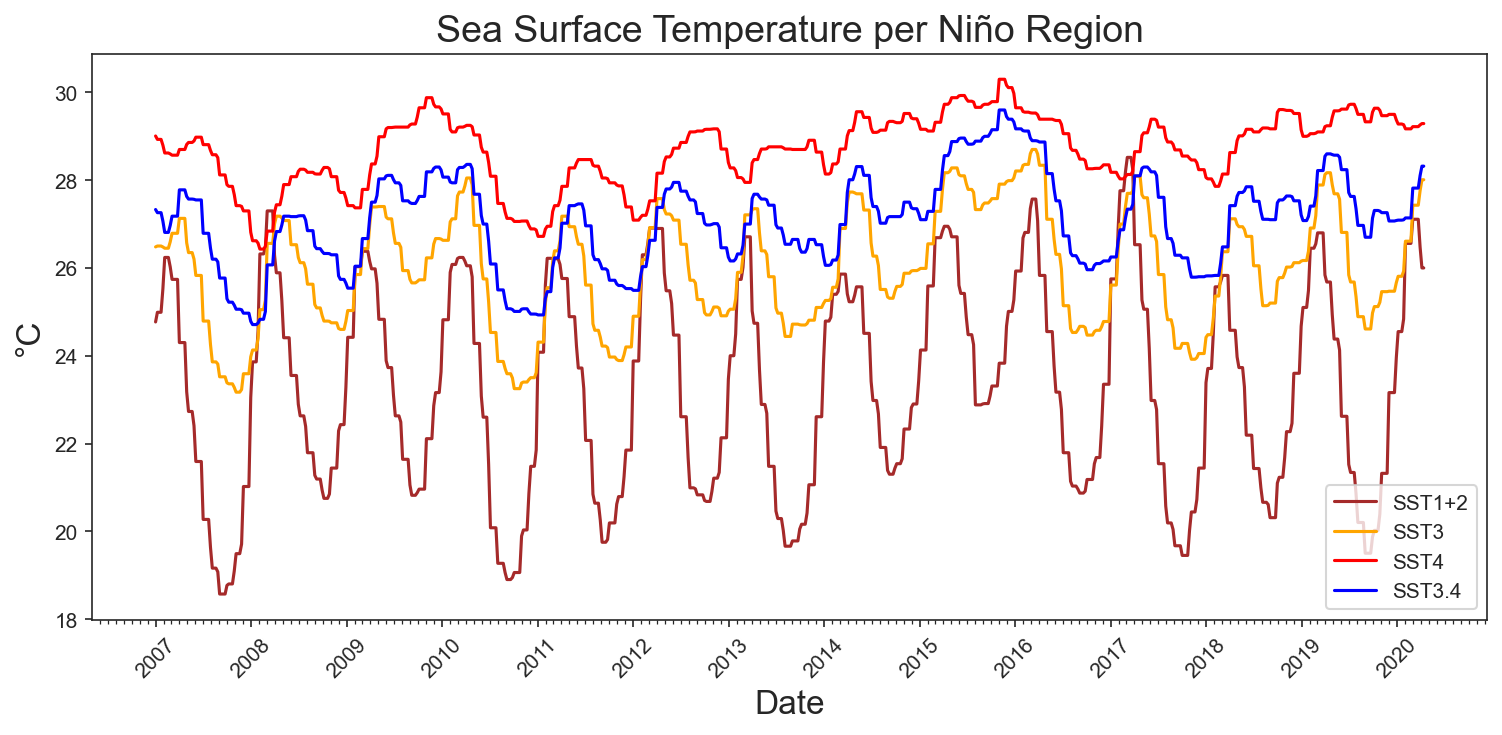

In [ ]:
x_array = [df.index]*4
y_array = [df["SST1+2"], df["SST3"], df["SST4"], df["SST3.4"]]
labels_array = ["SST1+2", "SST3", "SST4", "SST3.4"]
colors = ["brown","orange","red","blue"]
title = "Sea Surface Temperature per Niño Region"
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

# DENGUE PLOTS

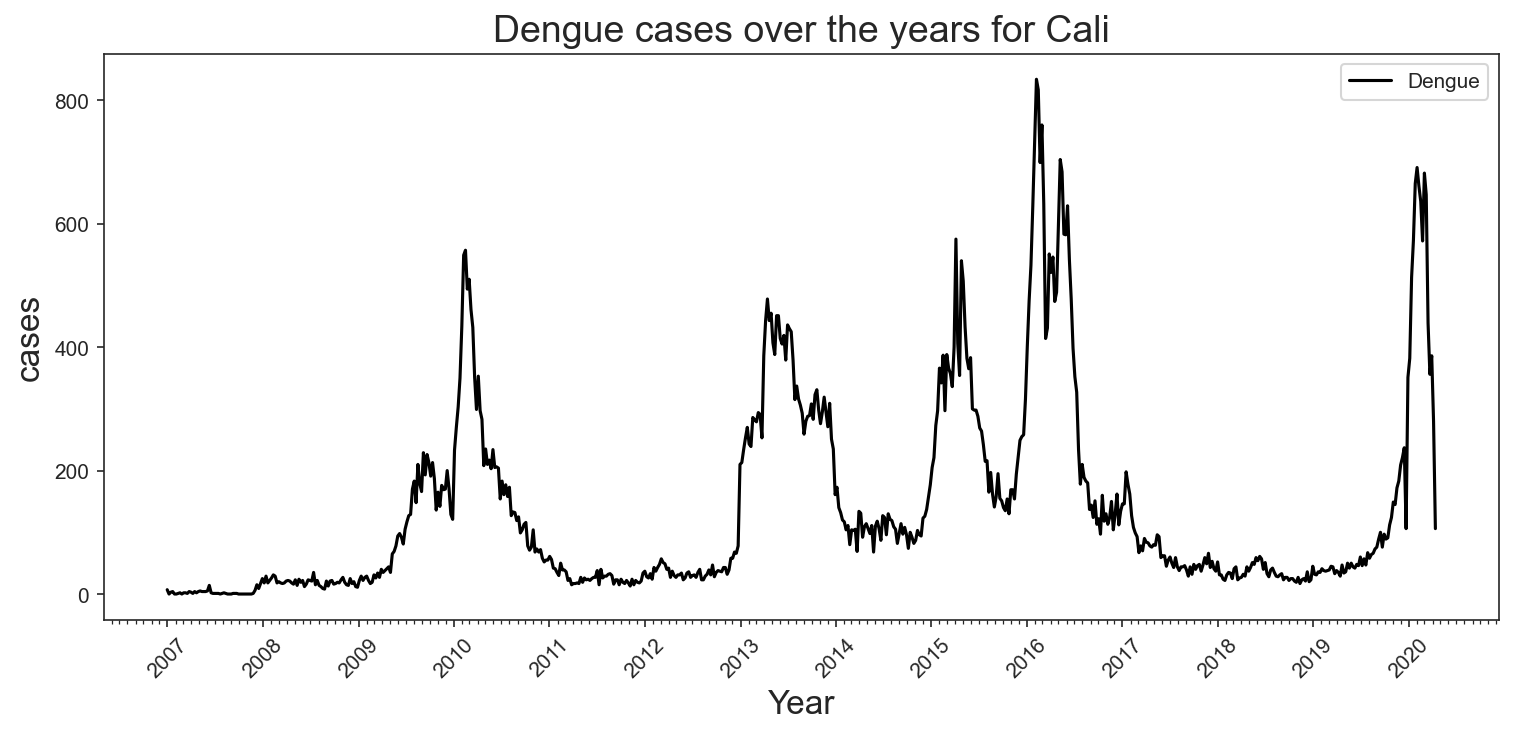

In [ ]:
x_array = [df.index]
y_array = [df["DENGUE"]]
labels_array = ["Dengue"]
title = "Dengue cases over the years for " + municipality
ylabel = "cases"
xlabel = "Year"
colors = ["black"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)


Text(0.5, 0, 'Month')

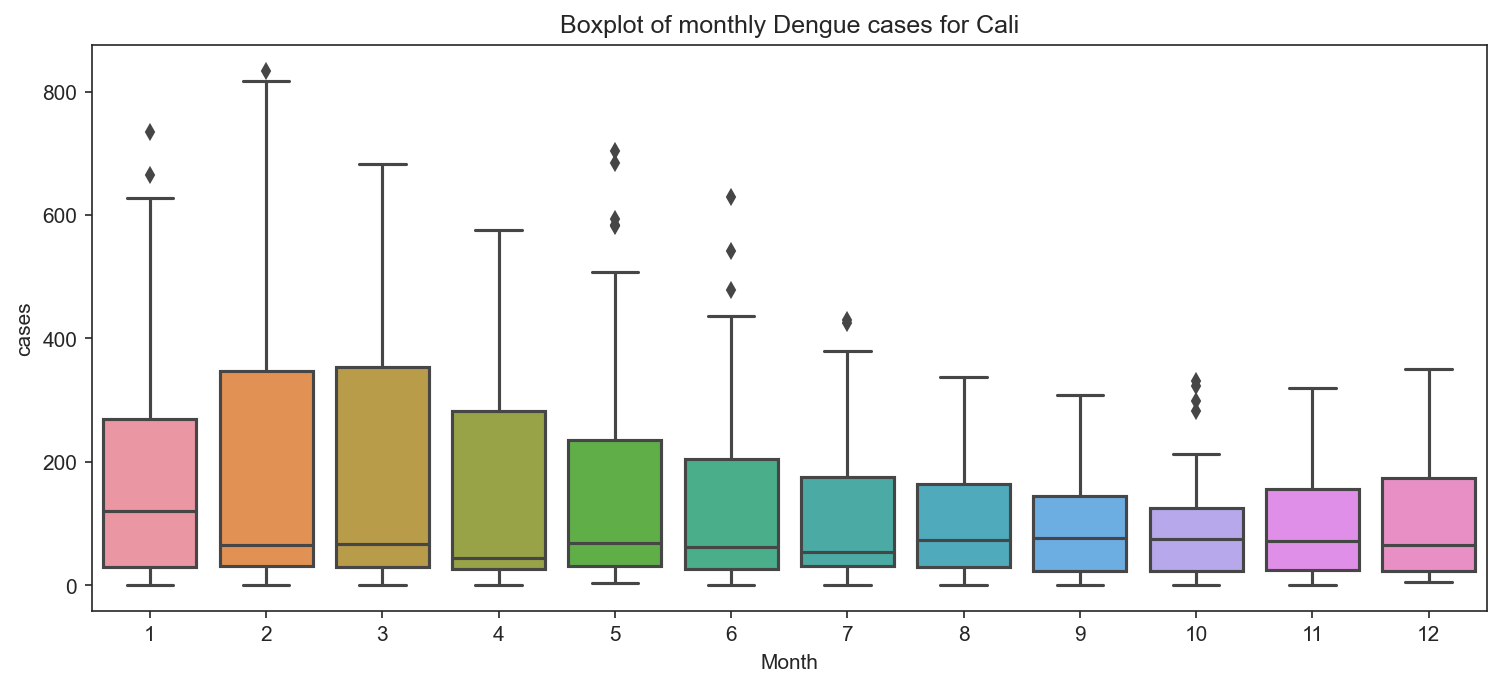

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["DENGUE"])
axes.set_title("Boxplot of monthly Dengue cases for " + municipality)
axes.set_ylabel("cases")
axes.set_xlabel("Month")

## BOXPLOTS FOR UNDERSTANDING THE BEHAVOIR OF EACH VARIABLE THROUGH TIME

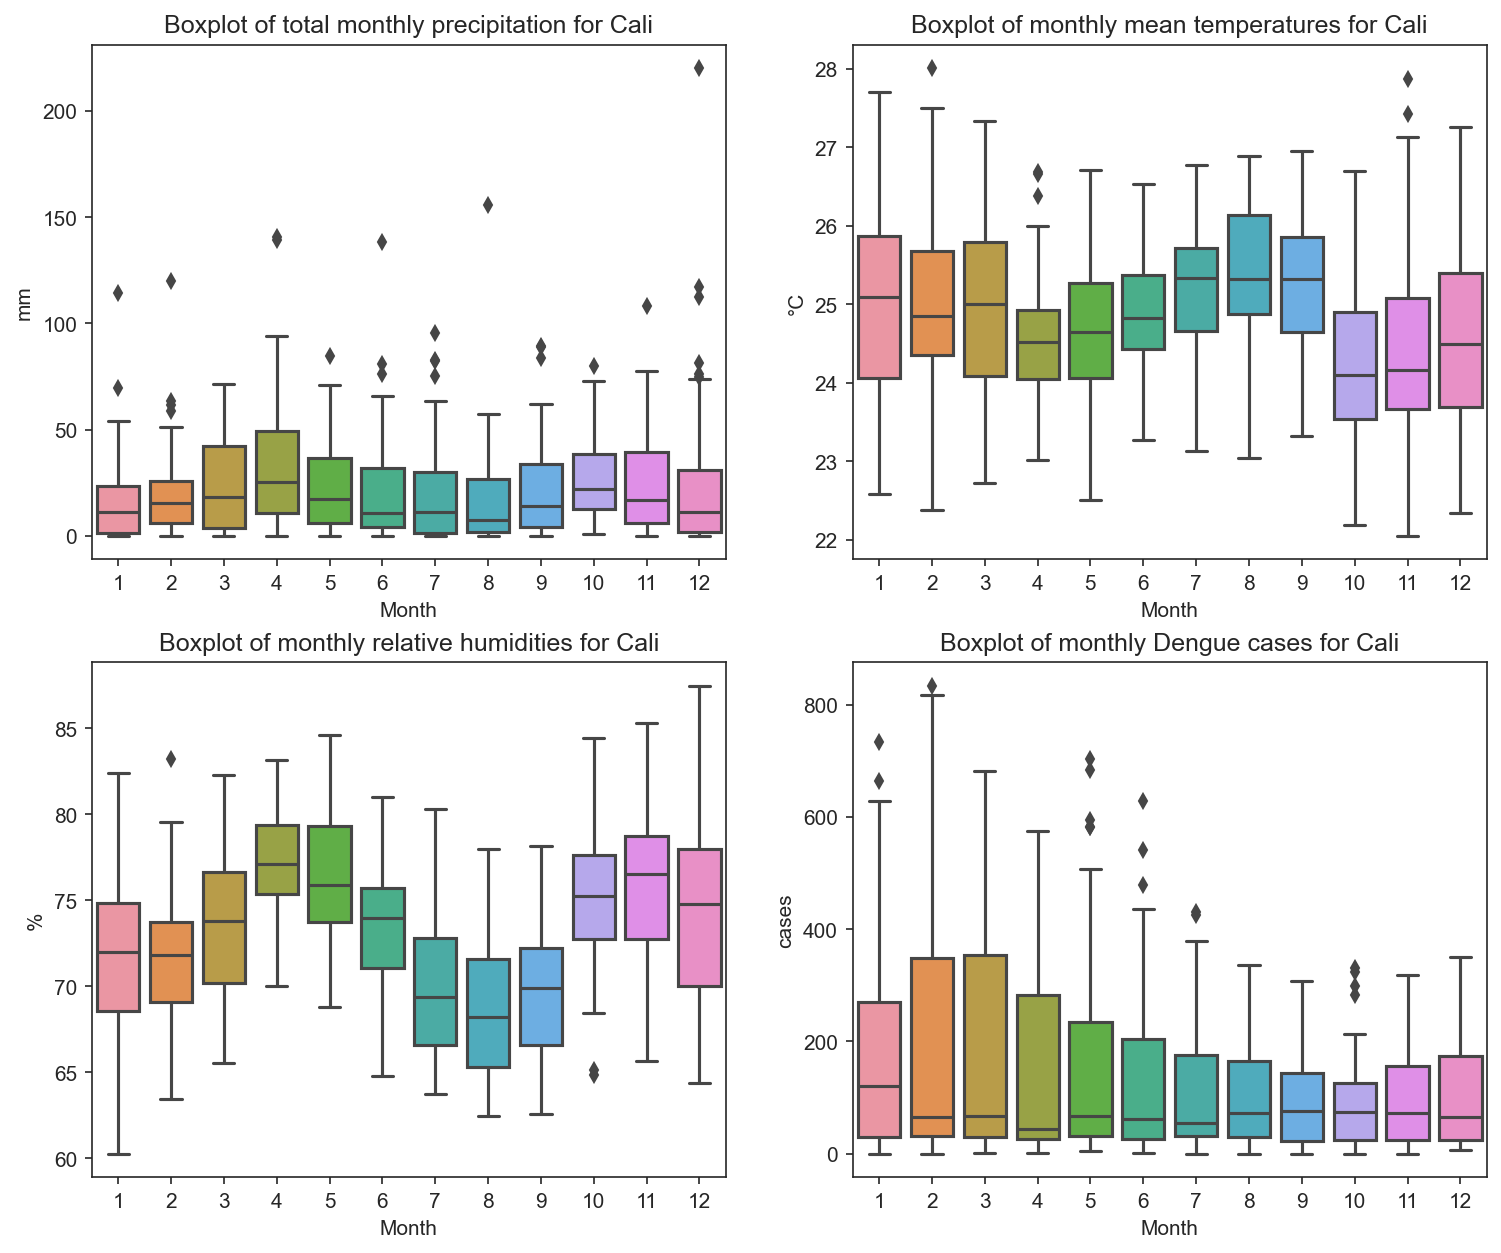

In [ ]:
cols = ['PRECIPITATION', 'TEMPERATURE_MEAN', 'REL_HUMIDITY_MEAN', 'DENGUE']
titles = ["Boxplot of total monthly precipitation for ", 
          "Boxplot of monthly mean temperatures for ",
          "Boxplot of monthly relative humidities for ",
          "Boxplot of monthly Dengue cases for "]
ylables = ['mm', '°C', '%', 'cases']

fig, ax = plt.subplots(figsize=(12, 10), dpi = 150)

for i, col in enumerate(cols):
    plt.subplot(2,2, i+1)
    sns.boxplot(x=df.index.month, y=df[col]).set_title(titles[i] + municipality)
    plt.ylabel(ylables[i])
    plt.xlabel("Month")

# SIMPLE CORRELATION BETWEEN ALL VARIABLES

Some of the variables do not have to be in the correlation matrix. That's why they are removed from the beginning.

In [ ]:
df_for_corr = df.drop(columns=['COD_DPTO',"COD_MUNICIPIO","POBLACION", "DENGUE GRAVE","MORTALIDAD POR DENGUE"])

In [ ]:
fig, axs = plt.subplots(1,figsize=(16,16), dpi = 200)
corrMatrix = df_for_corr.corr()
corrMatrix = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))
sns.heatmap(corrMatrix, annot=True)
plt.show()

We see that some variables are quite correlated, so we could remove some of these. Interestingly, despite being the closest to Cali the SST for Region 1+2 has the weakest correlation with Dengue cases.

From the correlation matrix we see that variables such as: mean temperature, MEI, ONI, SST4, SST3.4 and TNI are the most correlated with the number of Dengue cases.

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(12,12), dpi = 250)
axes = axes.flatten()
vars_to_plot = ["TEMPERATURE_MEAN","REL_HUMIDITY_MEAN","MEI","ONI","SST3.4","TNI"]
xlabels  = ["Mean temperature (°C)","Rel. humidity (%)", "MEI", "ONI", "SST3.4 (°C)", "TNI"]
colors = list(mcolors.get_named_colors_mapping().keys())[99:105]
for i,var in enumerate(vars_to_plot):
    sns.regplot(x = df[var], y = df["DENGUE"], ax = axes[i], color = colors[i])
    axes[i].set_title("Scatterplot of "+xlabels[i]+" vs Dengue cases in " + municipality)
    axes[i].set_ylabel("cases")
    axes[i].set_xlabel(xlabels[i])
plt.tight_layout()

# CORRELATION OVER THE YEARS WITH DELAYS BETWEEN THE COVARIATES AND THE DENGUE CASES

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAY', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

In order to calculate the correlation of dengue with the lagged covariates a function was created. This function guarantees that a correlation is calculated for each meteorological variable for a specific number of lags against dengue (`lag_size`).  

This function lags the meteorological covariate, but does not lag the dengue variable, and according to this data it calculates the respective correlation over time.

In [ ]:
def lagged_corr(weeks, var, window):
    return df[str(var)].shift(periods=weeks).iloc[weeks:].corr(df['DENGUE'].iloc[weeks:],
                                                            min_periods=window)
cols = ['PRECIPITATION', 'DRY_DAY', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE']

df_corr_melt = pd.melt(df.reset_index().reset_index(), id_vars='index', value_vars=cols)

The variables are kept to 24 lags, because after this period of time, usually the behavior starts repeating itself. This filter allows us to reduce the noise in the data.

In [ ]:
df_corr_melt.rename(columns={'index':'lag_size'}, inplace=True)
df_corr_melt = df_corr_melt[df_corr_melt["lag_size"]<=24]

In [ ]:
df_corr_melt['corr'] = df_corr_melt.apply(lambda x: lagged_corr(x.lag_size,
                                                          x.variable, 200), axis=1)

In [ ]:
df_corr_pivot = df_corr_melt.pivot_table(columns='lag_size', index='variable', values='corr')
row_max = np.abs(df_corr_pivot).idxmax(axis=1)
columns = row_max.index

In [ ]:
df_corr_pivot

lag_size                 0         1         2         3         4         5   \
variable                                                                        
DENGUE             1.000000  0.975126  0.949048  0.924960  0.893306  0.853027   
DRY_DAY            0.103897  0.103273  0.104569  0.110065  0.110805  0.105889   
MEI                0.475905  0.488344  0.500062  0.509450  0.517521  0.525301   
ONI                0.447333  0.465394  0.483133  0.498446  0.512495  0.526768   
PRECIPITATION     -0.036672 -0.044920 -0.044118 -0.037111 -0.044007 -0.047692   
REL_HUMIDITY_AMAX -0.185551 -0.187763 -0.196552 -0.195312 -0.198913 -0.197242   
REL_HUMIDITY_AMIN -0.091807 -0.081326 -0.081906 -0.073901 -0.070530 -0.066593   
REL_HUMIDITY_MEAN -0.184877 -0.184335 -0.192021 -0.189835 -0.188264 -0.188561   
SST1+2             0.269864  0.269289  0.266223  0.261680  0.257237  0.246677   
SST3               0.355758  0.354556  0.353277  0.353364  0.352862  0.348534   
SST3.4             0.400306  0.404344  0.409045  0.415165  0.420559  0.424721   
SST4               0.389832  0.396768  0.404189  0.412479  0.420922  0.430054   
TEMPERATURE_AMAX   0.298239  0.285240  0.277820  0.270579  0.260435  0.243539   
TEMPERATURE_AMIN   0.234299  0.251184  0.258585  0.277566  0.290359  0.299831   
TEMPERATURE_MEAN   0.361579  0.362732  0.370559  0.371488  0.369789  0.370510   
TEMPERATURE_RANGE  0.100615  0.090902  0.086417  0.073760  0.063444  0.050720   
TNI               -0.332656 -0.344773 -0.354988 -0.363988 -0.371396 -0.378850   

lag_size                 6         7         8         9   ...        15  \
variable                                                   ...             
DENGUE             0.814979  0.782149  0.749172  0.717972  ...  0.558945   
DRY_DAY            0.103553  0.115213  0.112783  0.108342  ...  0.100360   
MEI                0.532416  0.538801  0.544925  0.550448  ...  0.577625   
ONI                0.540690  0.552615  0.563067  0.572066  ...  0.599505   
PRECIPITATION     -0.053868 -0.052674 -0.066672 -0.064582  ... -0.077991   
REL_HUMIDITY_AMAX -0.208403 -0.212193 -0.200836 -0.197267  ... -0.174901   
REL_HUMIDITY_AMIN -0.065097 -0.065958 -0.060446 -0.060030  ... -0.122985   
REL_HUMIDITY_MEAN -0.197371 -0.199018 -0.196287 -0.211032  ... -0.244764   
SST1+2             0.233653  0.221540  0.210683  0.193241  ...  0.067928   
SST3               0.343138  0.339803  0.336951  0.329493  ...  0.265646   
SST3.4             0.428759  0.434182  0.438999  0.441889  ...  0.437850   
SST4               0.439826  0.449811  0.458883  0.467659  ...  0.501129   
TEMPERATURE_AMAX   0.240223  0.235995  0.226312  0.219583  ...  0.229207   
TEMPERATURE_AMIN   0.309811  0.323382  0.324967  0.332894  ...  0.289644   
TEMPERATURE_MEAN   0.379486  0.385730  0.382845  0.394097  ...  0.377604   
TEMPERATURE_RANGE  0.038518  0.027225  0.017127  0.010024  ...  0.030847   
TNI               -0.385289 -0.389592 -0.393217 -0.396160  ... -0.388616   

lag_size                 16        17        18        19        20        21  \
variable                                                                        
DENGUE             0.531934  0.503683  0.474084  0.444942  0.414590  0.385663   
DRY_DAY            0.117850  0.111492  0.128458  0.136180  0.156207  0.160294   
MEI                0.578717  0.579665  0.581141  0.581756  0.581243  0.581755   
ONI                0.599435  0.598501  0.595797  0.592053  0.588218  0.584295   
PRECIPITATION     -0.084108 -0.085006 -0.087610 -0.092724 -0.103055 -0.097745   
REL_HUMIDITY_AMAX -0.185390 -0.208513 -0.231221 -0.242918 -0.274316 -0.304233   
REL_HUMIDITY_AMIN -0.146412 -0.170411 -0.196913 -0.222729 -0.242625 -0.254601   
REL_HUMIDITY_MEAN -0.260953 -0.278340 -0.303168 -0.316554 -0.329659 -0.346929   
SST1+2             0.047867  0.029272  0.008171 -0.011159 -0.026279 -0.038093   
SST3               0.253268  0.241899  0.229808  0.218950  0.210370  0.203844   
SST3.4             0.432730  0.427934  0.42

In [ ]:
df_corr_melt.variable.unique()

array(['PRECIPITATION', 'DRY_DAY', 'TEMPERATURE_AMAX',
       'REL_HUMIDITY_AMAX', 'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN',
       'TEMPERATURE_MEAN', 'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN',
       'MEI', 'ONI', 'SST1+2', 'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE'],
      dtype=object)

In [ ]:
df_corr_melt_sub = df_corr_melt[df_corr_melt['variable'].isin(('MEI', 'ONI', 'SST1+2', 'SST3', 'SST4', 'SST3.4', 'TNI'))]
# df_corr_melt_sub

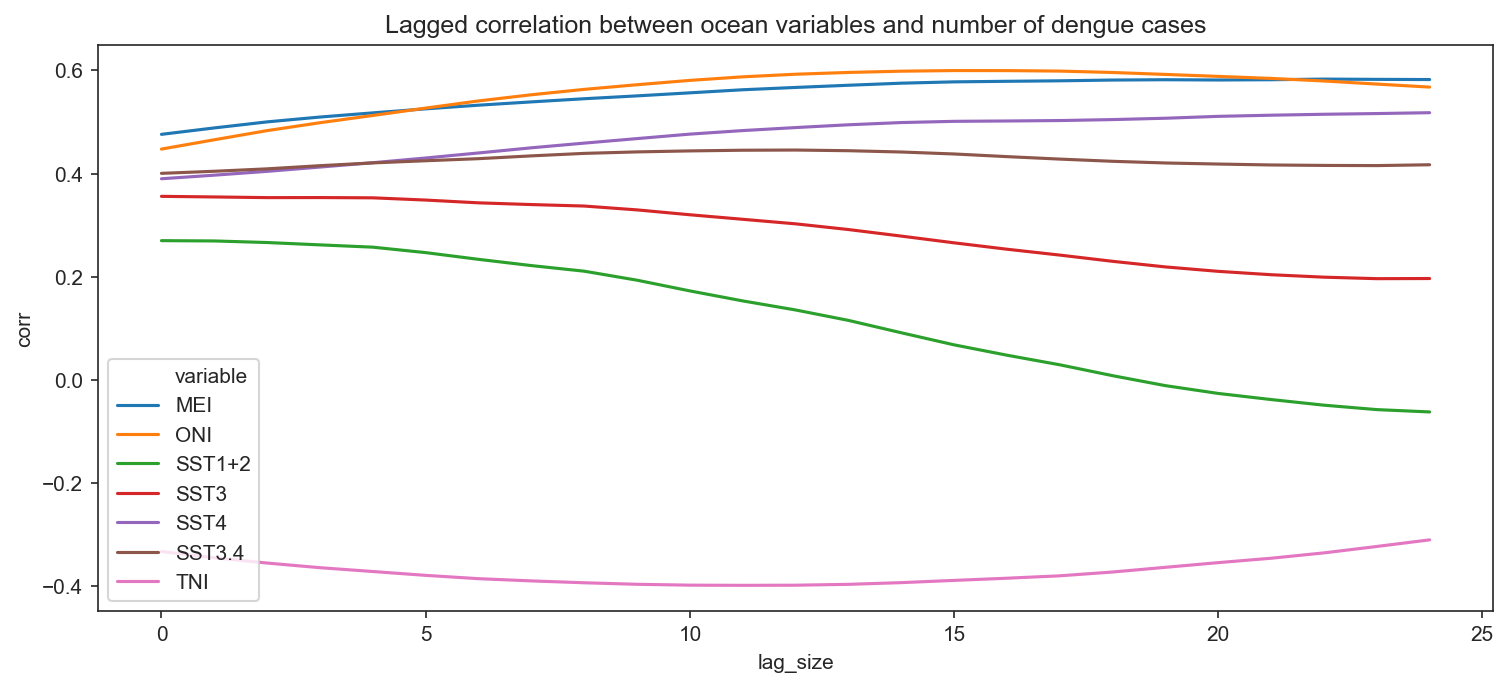

In [ ]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub, hue = 'variable').set_title('Lagged correlation between ocean variables and number of dengue cases')

In [ ]:
df_corr_melt_sub3 = df_corr_melt[df_corr_melt['variable'] == 'DENGUE']
# df_corr_melt_sub3

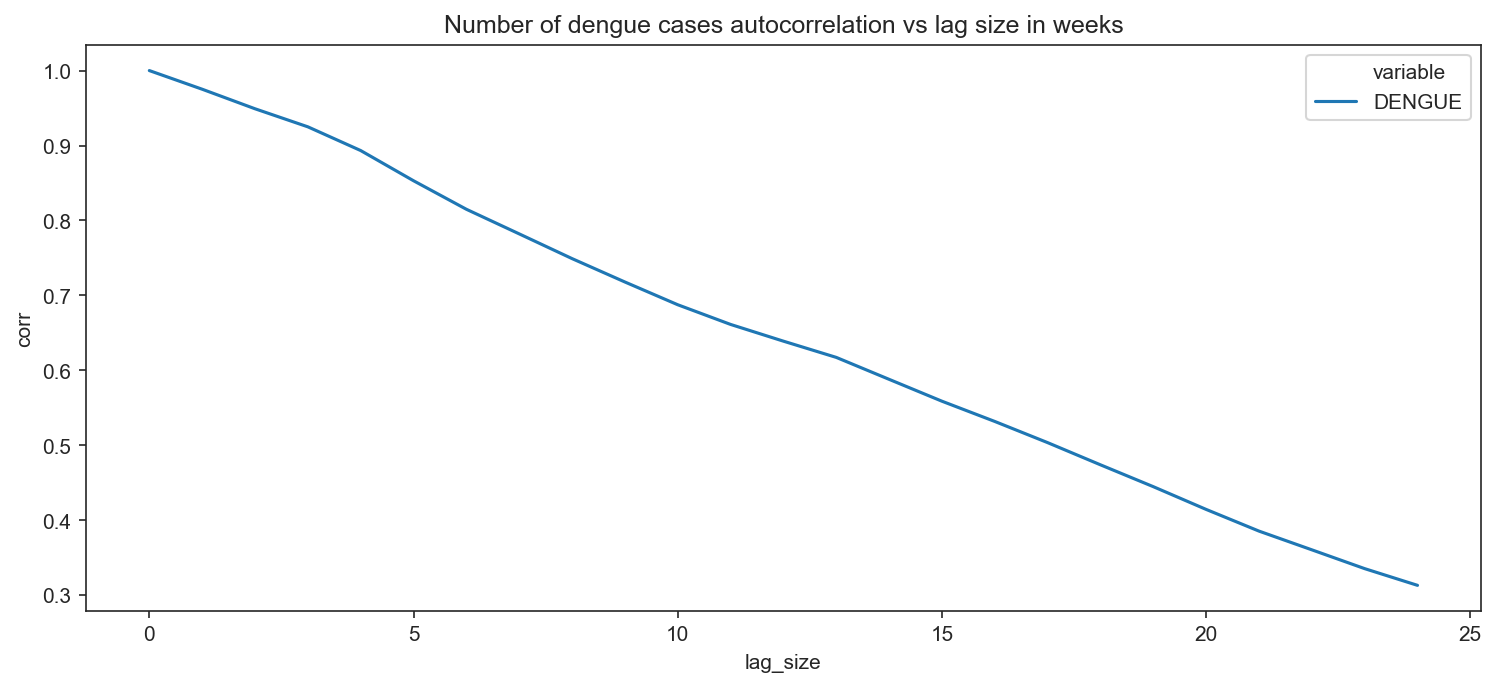

In [ ]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub3, hue = 'variable').set_title('Number of dengue cases autocorrelation vs lag size in weeks')

In [ ]:
df_corr_melt_sub2 = df_corr_melt[df_corr_melt['variable'].isin(('TEMPERATURE_MEAN', 'REL_HUMIDITY_MEAN', 'PRECIPITATION'))]
# df_corr_melt_sub2

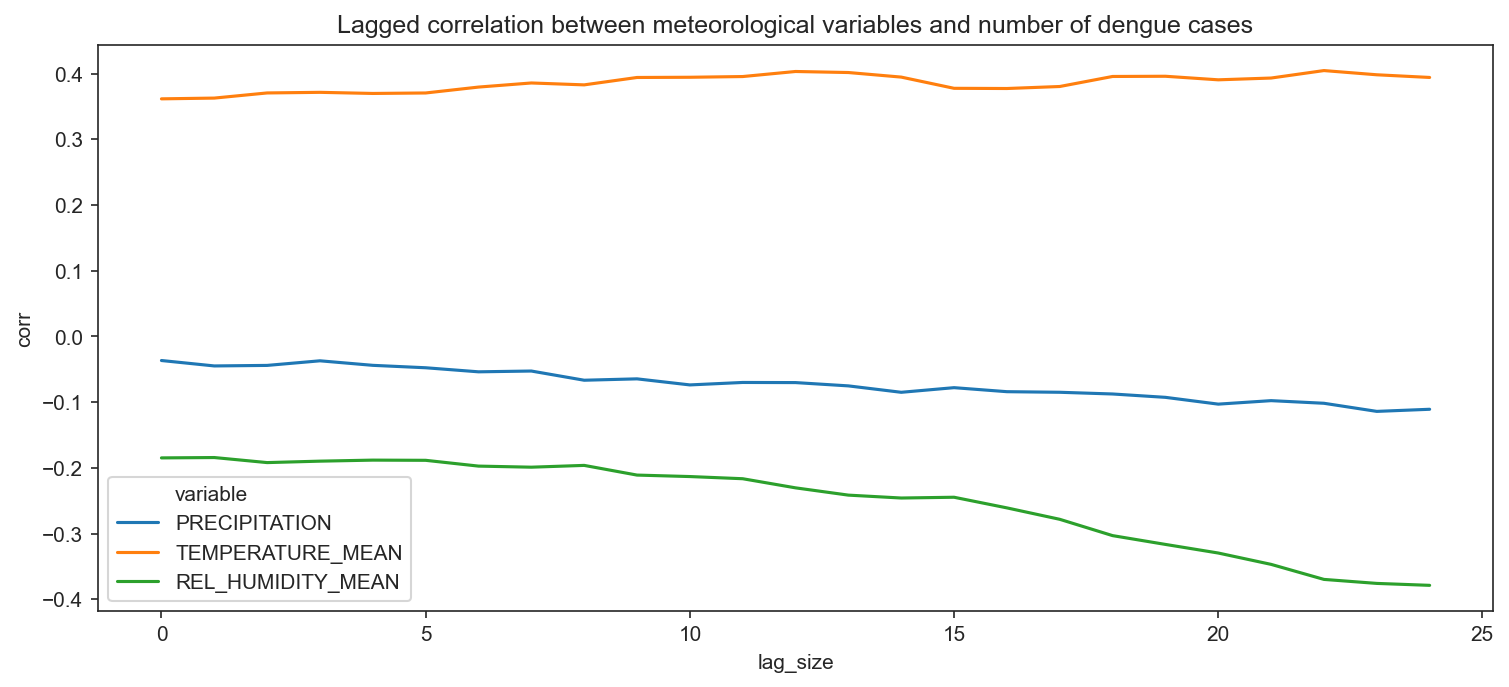

In [ ]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub2, hue = 'variable').set_title('Lagged correlation between meteorological variables and number of dengue cases')

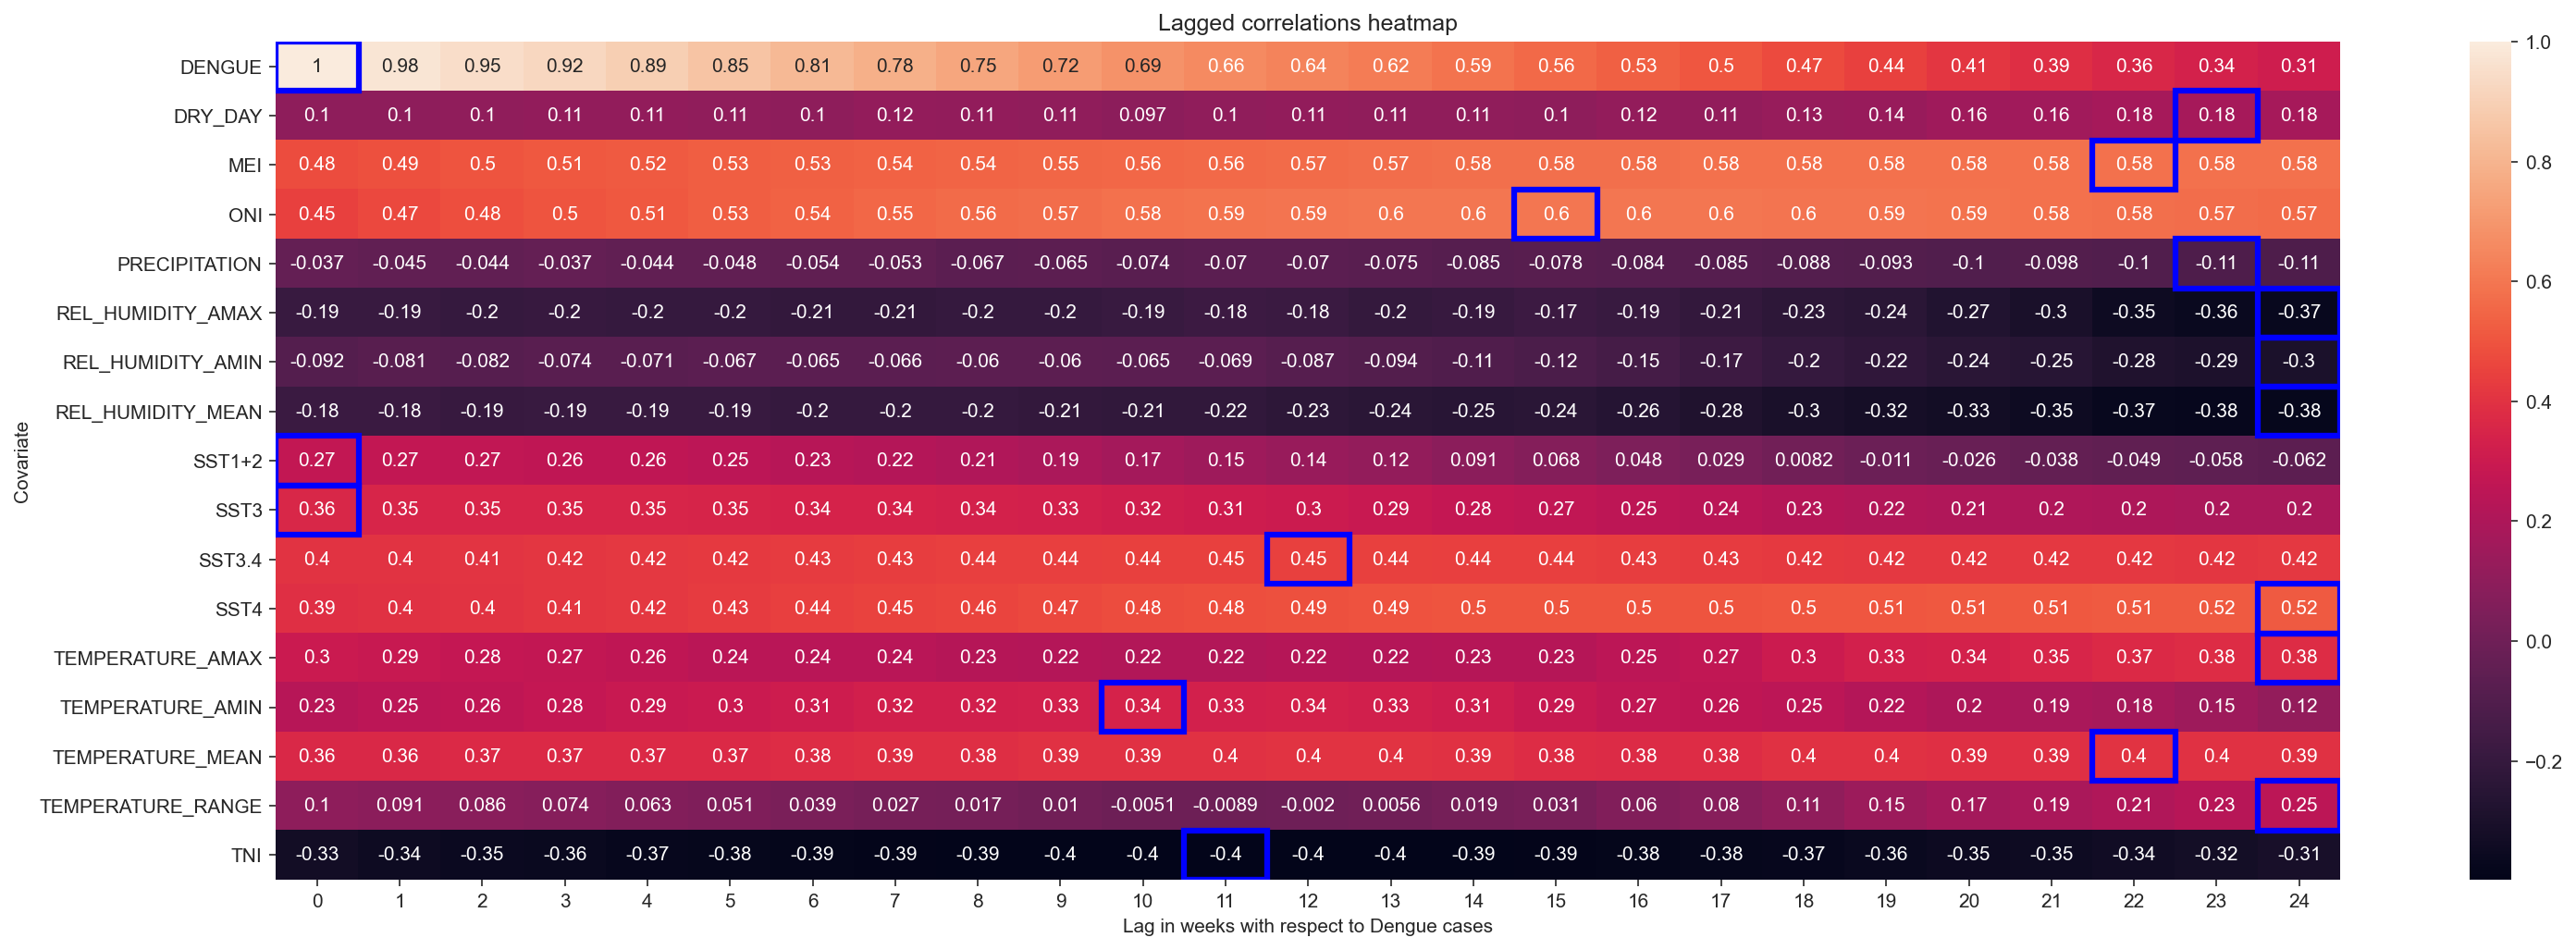

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(24,8), dpi = 150)
sns.heatmap(df_corr_pivot, annot = True, ax = ax)
ax.set_xlabel("Lag in weeks with respect to Dengue cases")
ax.set_title("Lagged correlations heatmap")
ax.set_ylabel("Covariate");
for row, index in enumerate(columns):
    position = df_corr_pivot.columns.get_loc(row_max[index])
    ax.add_patch(Rectangle((position, row),1,1, fill=False, edgecolor='blue', lw=3))


The following function is done with the purpose of calculating the correlation between the meteorological variables and the lagged dengue, this variable is lagged up to 17 times and the `phases_confirmed` dataframe shows the result of this calculations.

In [ ]:
def obtener_conjunto_desfasado(datos,meses_desfase):
    dat_desfase = datos.copy().reset_index(drop=True)
    for i in range(len(dat_desfase)-meses_desfase):
        dat_desfase.loc[i,"DENGUE_UNPHASED"] = dat_desfase.loc[i+meses_desfase,"DENGUE"]
    quitar_filas = list(range(len(dat_desfase)-meses_desfase,len(dat_desfase)))
    dat_desfase= dat_desfase.drop(dat_desfase.index[quitar_filas])
    return dat_desfase

In [ ]:
df_for_corr_2 = df_for_corr[cols]
phases = [obtener_conjunto_desfasado(df_for_corr_2, i).corr(method='pearson').iloc[:,-1:] for i in range(17)]
phases_confirmed = pd.concat(phases, axis = 1)

In [ ]:
phases_confirmed

DENGUE_UNPHASED  DENGUE_UNPHASED  DENGUE_UNPHASED  \
PRECIPITATION            -0.036672        -0.044920        -0.044118   
DRY_DAY                   0.103897         0.103273         0.104569   
TEMPERATURE_AMAX          0.298239         0.285240         0.277820   
REL_HUMIDITY_AMAX        -0.185551        -0.187763        -0.196552   
TEMPERATURE_AMIN          0.234299         0.251184         0.258585   
REL_HUMIDITY_AMIN        -0.091807        -0.081326        -0.081906   
TEMPERATURE_MEAN          0.361579         0.362732         0.370559   
TEMPERATURE_RANGE         0.100615         0.090902         0.086417   
REL_HUMIDITY_MEAN        -0.184877        -0.184335        -0.192021   
MEI                       0.475905         0.488344         0.500062   
ONI                       0.447333         0.465394         0.483133   
SST1+2                    0.269864         0.269289         0.266223   
SST3                      0.355758         0.354556         0.353277   
SST4                      0.389832         0.396768         0.404189   
SST3.4                    0.400306         0.404344         0.409045   
TNI                      -0.332656        -0.344773        -0.354988   
DENGUE                    1.000000         0.975126         0.949048   
DENGUE_UNPHASED           1.000000         1.000000         1.000000   

                   DENGUE_UNPHASED  DENGUE_UNPHASED  DENGUE_UNPHASED  \
PRECIPITATION            -0.037111        -0.044007        -0.047692   
DRY_DAY                   0.110065         0.110805         0.105889   
TEMPERATURE_AMAX          0.270579         0.260435         0.243539   
REL_HUMIDITY_AMAX        -0.195312        -0.198913        -0.197242   
TEMPERATURE_AMIN          0.277566         0.290359         0.299831   
REL_HUMIDITY_AMIN        -0.073901        -0.070530        -0.066593   
TEMPERATURE_MEAN          0.371488         0.369789         0.370510   
TEMPERATURE_RANGE         0.073760         0.063444         0.050720   
REL_HUMIDITY_MEAN        -0.189835        -0.188264        -0.188561   
MEI                       0.509450         0.517521         0.525301   
ONI                       0.498446         0.512495         0.526768   
SST1+2                    0.261680         0.257237         0.246677   
SST3                      0.353364         0.352862         0.348534   
SST4                      0.412479         0.420922         0.430054   
SST3.4                    0.415165         0.420559         0.424721   
TNI                      -0.363988        -0.371396        -0.378850   
DENGUE                    0.924960         0.893306         0.853027   
DENGUE_UNPHASED           1.000000         1.000000         1.000000   

                   DENGUE_UNPHASED  DENGUE_UNPHASED  DENGUE_UNPHASED  \
PRECIPITATION            -0.053868        -0.052674        -0.066672   
DRY_DAY                   0.103553         0.115213         0.112783   
TEMPERATURE_AMAX          0.240223         0.235995         0.226312   
REL_HUMIDITY_AMAX        -0.208403        -0.212193        -0.200836   
TEMPERATURE_AMIN          0.309811         0.323382         0.324967   
REL_HUMIDITY_AMIN        -0.065097        -0.065958        -0.060446   
TEMPERATURE_MEAN          0.379486         0.385730         0.382845   
TEMPERATURE_RANGE         0.038518         0.027225         0.017127   
REL_HUMIDITY_MEAN        -0.197371        -0.199018        -0.196287   
MEI                       0.532416         0.538801         0.544925   
ONI                       0.540690         0.552615         0.563067   
SST1+2                    0.233653         0.221540         0.210683   
SST3                      0.343138         0.339803         0.336951   
SST4                      0.439826         0.449811         0.458883   
SST3.4                    0.428759         0.434182         0.438999   
TNI                      -0.385289        -0.389592        -0.393217   
DENGUE                    0.814979         0.782149      